***
# 4.1 Bio-mechanic Estimationsfor Bird 26
### JX, 03/19/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = 'Bird26'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels
0,0,2.530000,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-7.5537066, 8.209083]",21,21|0|1.0|1.0|0.0|nan|nan|nan|nan,154,4
1,0,2.530000,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.6834063, 9.239816]",11,11|0|0.0|1.0|0.0|1.0|0.0|0.0|nan,14,2
2,0,2.530000,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.5902307, -12.39612]",0,0|0|0.0|0.0|1.0|0.0|nan|nan|nan,1,0
3,0,2.530000,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7.0395265, 3.0541244]",26,26|1|1.0|0.0|nan|nan|nan|nan|nan,206,19
4,1,7.660000,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1442027, -3.2366111]",12,12|1|0.0|1.0|0.0|nan|nan|nan|nan,37,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1426,7451.938961,7454.270021,2.331060,11,6,7453.230000,7453.347846,0.117846,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 0.00020218813079315542, 0.00039304040322...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.835227, 3.594297]",25,25|1|1.0|1.0|0.0|0.0|nan|nan|nan,195,17
10862,1426,7451.938961,7454.270021,2.331060,11,7,7453.430000,7453.582862,0.152862,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -6.027892231941223e-05, -0.000147847971...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.1574388, 3.9381824]",25,25|0|0.0|0.0|nan|nan|nan|nan|nan,188,11
10863,1426,7451.938961,7454.270021,2.331060,11,8,7453.582862,7453.644792,0.061930,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.0007704722401279731, -0.002082758701...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.96411866, 1.086623]",19,19|0|0.0|1.0|1.0|0.0|nan|nan|nan,118,9
10864,1426,7451.938961,7454.270021,2.331060,11,9,7453.786119,7453.917918,0.131800,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -2.3817842366836413e-06, -8.17539332897...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2.2781262, -6.882173]",9,9|0|0.0|1.0|0.0|nan|nan|nan|nan,234,27


In [3]:
## Tap into dyadic calculations

In [4]:
import scipy.stats as stats
import numpy as np

In [5]:
def construct_rhythm_df(onsets, syntactic_units, expected_interval_range, note_len = [0]):
    '''
    This function transforms a list of onsets and list of syntactic units for rhythm analyses
    '''
    
    ### DISCOVER ALL INTER-ONSET INTERVALS
    ## Use counter design
    i = 0
    intervals = []
    avg_len = np.mean(note_len)
    
    ## for every note onset
    for onset in onsets:
        
        ## if at last note, exit for loop
        if i == (len(onsets) - 1):
            continue
            
        ## interval = next onset - current onset, add to interval list
        interval = onsets[i + 1] - onsets[i]
        
        ######## IF CONTROL IS ON, substract note_len to nullify note_len, and repopulate with mean note_len
        interval = interval - note_len[i] + avg_len
        
        intervals.append(interval)
        
        ## counter up
        i = i + 1
        
    ## Collect intervals into dyadic formation
    
    ## interval 1 does not include last interval
    intervals1 = list(intervals)
    del(intervals1[-1])
    
    ## interval 2 does not include first interval
    intervals2 = list(intervals)
    del(intervals2[0])
    
    ## Put intervals into datafrmae
    d = {'intervals1': intervals1, 'intervals2': intervals2}
    dyadic = pd.DataFrame(data = d)
    
    ## back propagate label and spec information
    
    ## note identity 1 // Delete last two values
    labels1 = list(syntactic_units)
    del(labels1[-1])
    del(labels1[-1])
    
    ## note identity 2 // Delete first and last value
    labels2 = list(syntactic_units)
    del(labels2[0])
    del(labels2[-1])
    
    ## note identity 3 // Delete first two values
    labels3 = list(syntactic_units)
    del(labels3[0])
    del(labels3[0])
    
    ## fill
    dyadic['label1'] = labels1
    dyadic['label2'] = labels2
    dyadic['label3'] = labels3
    
    ## Sort dyadic into short/long interval
    ### sort all intervals and calculate necessary components
    s_interval = []
    l_interval = []
    cycle_dur = []
    ratio_custom = []
    ratio_roeske = []
    
    ## for every dyadic
    for index, row in dyadic.iterrows():

        i1 = row['intervals1']
        i2 = row['intervals2']

        ## short long decider
        if i1 > i2:
            s = i2
            l = i1
        else:
            s = i1
            l = i2
            
        ## calculate components
        s_interval.append(s)
        l_interval.append(l)
        cycle_dur.append(s + l)
        ratio_roeske.append(i1/(i1+i2))
        ratio_custom.append(s/l)

    ## push into dyadic
    dyadic['s_interval'] = s_interval
    dyadic['l_interval'] = l_interval
    dyadic['cycle_dur'] = cycle_dur
    dyadic['ratio_roeske'] = ratio_roeske
    dyadic['ratio_custom'] = ratio_custom
    
    ## sort ascending by shortest cycle to longest cycle
    dyadic = dyadic.sort_values(by = ['cycle_dur'])
    
    ## filter out transition between phrases
    dyadic = dyadic[dyadic['l_interval'] < expected_interval_range[1]]
    dyadic = dyadic[dyadic['s_interval'] > expected_interval_range[0]]
    
    ## put cycle rank into data frame
    dyadic['cycle_rank'] = dyadic['cycle_dur'].rank().astype(int)
    
    return dyadic

In [6]:
onsets = note_df['note_strt']
syntactic_units = note_df['lasso_labels']
expected_interval_range = [0, 1]
dataset_description = 'Songbird: Pied Butcherbirds'

In [7]:
dyadic = construct_rhythm_df(
    onsets = onsets, 
    syntactic_units = syntactic_units, 
    expected_interval_range = expected_interval_range,
    note_len = note_df['note_len']
)

In [8]:
np.mean(note_df['note_len'])

0.14423228605473912

In [9]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
4125,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11
2142,0.144232,0.144232,10,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11
2143,0.144232,0.144232,17,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11
75,0.144232,0.144232,10,16,18,0.144232,0.144232,0.288465,0.500000,1.000000,11
1897,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11
...,...,...,...,...,...,...,...,...,...,...,...
6731,0.328468,0.633028,34,34,4,0.328468,0.633028,0.961496,0.341622,0.518884,8010
5143,0.148016,0.966149,7,12,33,0.148016,0.966149,1.114165,0.132849,0.153202,8011
8981,0.946524,0.210926,2,33,34,0.210926,0.946524,1.157450,0.817767,0.222843,8012
8980,0.223212,0.946524,24,2,33,0.223212,0.946524,1.169735,0.190822,0.235823,8013


## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [10]:
import numpy as np
import numpy.random as random
import seaborn as sns

In [11]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [12]:
interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
uni_ratio = interval1_uni / (interval1_uni + interval2_uni)

<AxesSubplot:ylabel='Count'>

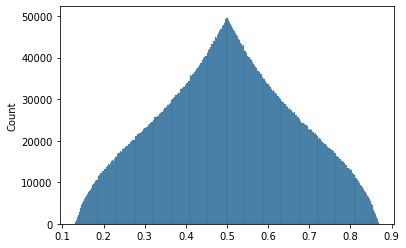

In [13]:
sns.histplot(uni_ratio)

## plot

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR
import seaborn as sns

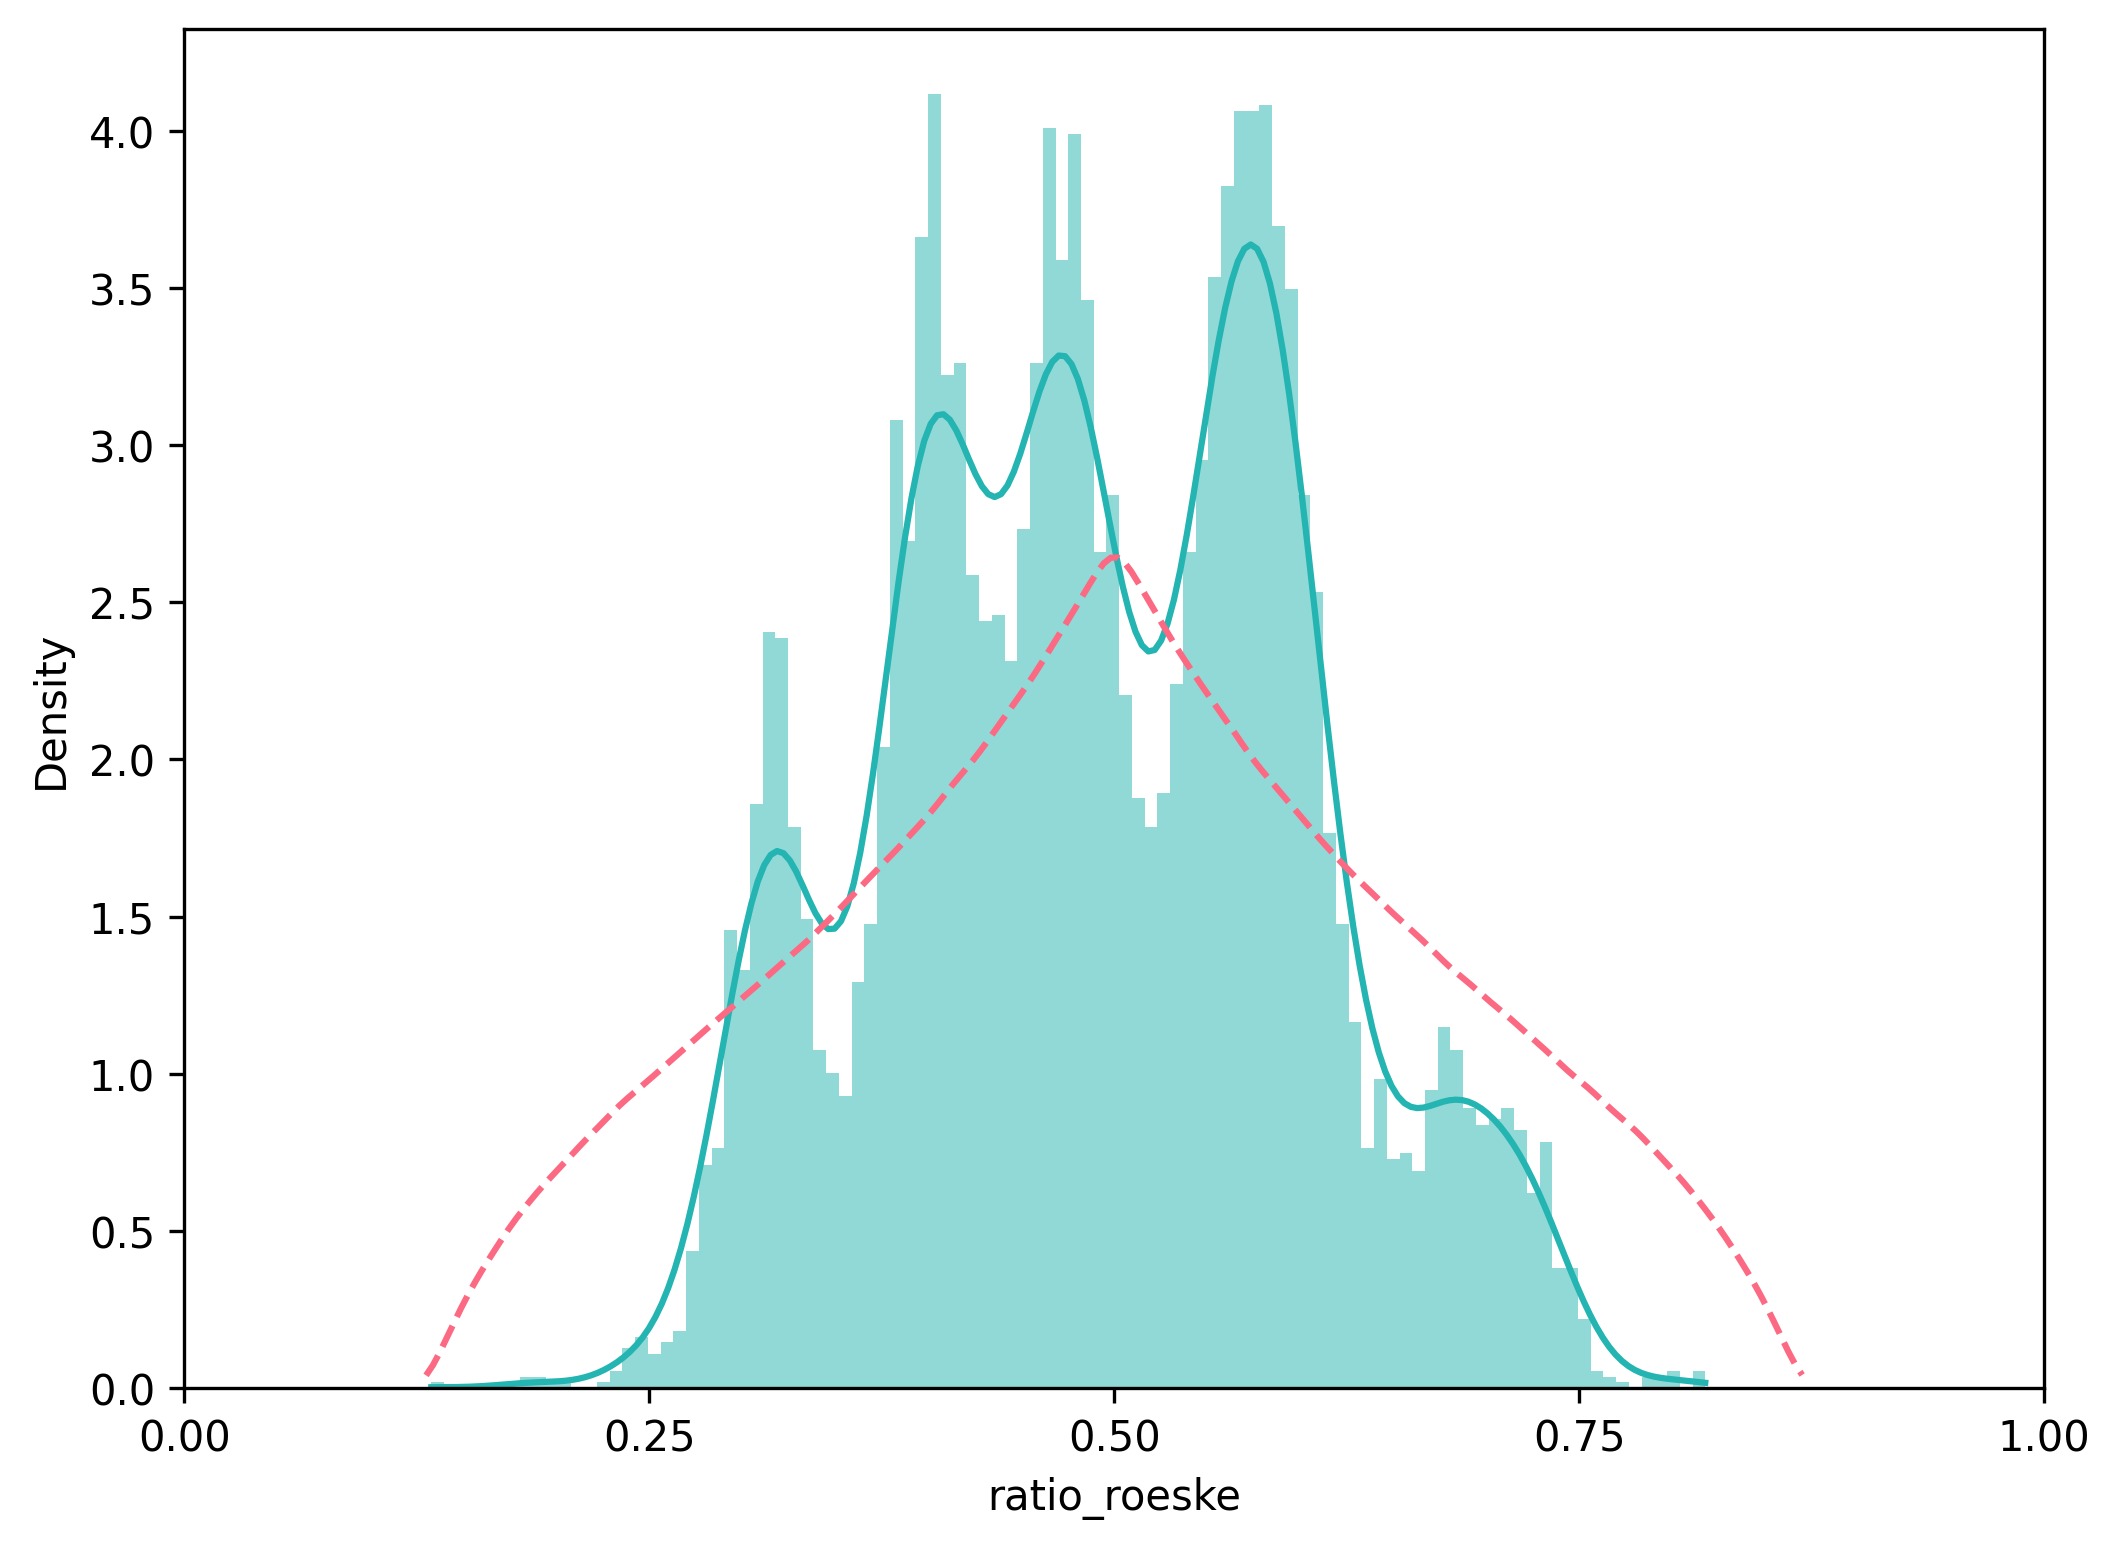

In [15]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    bins = 100,
    stat = 'density',
    color = "#24B4B1",
    kde = True
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    bins = 100,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'lengthcontrol_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/figname)

## Find Consistent Transitions (Copied from 3.1)

In [16]:
from butcherbird import sequential

In [17]:
import numpy as np

In [18]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


In [19]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [20]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
p_container

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28

[array([0.02926829, 0.00731707, 0.06585366, ..., 0.02040816, 0.02040816,
        0.        ]),
 array([0.0390625 , 0.01302083, 0.07552083, ..., 0.05769231, 0.01923077,
        0.        ]),
 array([0.04244032, 0.01856764, 0.10344828, ..., 0.0212766 , 0.0212766 ,
        0.        ]),
 array([0.04411765, 0.01715686, 0.06862745, ..., 0.07142857, 0.        ,
        0.        ]),
 array([0.03790087, 0.01749271, 0.0845481 , ..., 0.03571429, 0.01785714,
        0.        ]),
 array([0.05509642, 0.00826446, 0.09090909, ..., 0.03571429, 0.03571429,
        0.03571429]),
 array([0.03373494, 0.00481928, 0.10120482, ..., 0.02222222, 0.02222222,
        0.        ]),
 array([0.04021448, 0.01072386, 0.0616622 , ..., 0.09375   , 0.        ,
        0.        ]),
 array([0.0275    , 0.015     , 0.075     , ..., 0.04255319, 0.        ,
        0.        ]),
 array([0.04545455, 0.00802139, 0.07486631, ..., 0.0625    , 0.02083333,
        0.        ]),
 array([0.03414634, 0.00731707, 0.07804878, ..., 0

In [21]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [22]:
p = np.swapaxes(p_container, 0, 1)

In [23]:
p

array([[0.02926829, 0.0390625 , 0.04244032, ..., 0.02337662, 0.03473945,
        0.03571429],
       [0.00731707, 0.01302083, 0.01856764, ..., 0.00779221, 0.00744417,
        0.00765306],
       [0.06585366, 0.07552083, 0.10344828, ..., 0.07532468, 0.05210918,
        0.08673469],
       ...,
       [0.02040816, 0.05769231, 0.0212766 , ..., 0.0625    , 0.04761905,
        0.01923077],
       [0.02040816, 0.01923077, 0.0212766 , ..., 0.        , 0.03174603,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [25]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
higherconfints

[0.03894554065551008,
 0.011034467545792036,
 0.07707105689779137,
 0.002688391276837125,
 0.06975663847556281,
 0.017606717279722083,
 0.0408582491918574,
 0.01641378305895368,
 0.05129843736134144,
 0.04021002953398356,
 0.034837828359477754,
 0.010776733338237466,
 0.012578900371596216,
 0.026404902191360567,
 0.03536607279787071,
 0.04050083419549786,
 0.03152149897397881,
 0.02054286022287104,
 0.019849982558270526,
 0.04030349437811436,
 0.03618715174744549,
 0.04046451667343118,
 0.02113510590298789,
 0.023293905135723877,
 0.04830189038022063,
 0.006406372776606788,
 0.024837132380705954,
 0.03444846008040012,
 0.039961886734704424,
 0.003399779729850833,
 0.0033048028372999996,
 0.003743807799059971,
 0.03821154449734016,
 0.033500755838652384,
 0.04503692087808649,
 0.009868186924972962,
 0.00520327716966963,
 0.04004236244234932,
 0.013687359963276888,
 0.0777084768250346,
 0.0027542967010144074,
 0.07170806131968457,
 0.017041430159581785,
 0.041602183159673956,
 0.01639918

In [26]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [27]:
trans_long

,songType,noteType,markov,p
0,True,0,0,0.000000
1,True,0,1,0.000000
2,True,0,2,0.000000
3,True,0,3,0.000000
4,True,0,4,0.005155
...,...,...,...,...
1364,True,36,32,0.085106
1365,True,36,33,0.000000
1366,True,36,34,0.000000
1367,True,36,35,0.000000


In [28]:
trans_long['higherconfint'] = higherconfints

In [29]:
trans_long

,songType,noteType,markov,p,higherconfint
0,True,0,0,0.000000,0.038946
1,True,0,1,0.000000,0.011034
2,True,0,2,0.000000,0.077071
3,True,0,3,0.000000,0.002688
4,True,0,4,0.005155,0.069757
...,...,...,...,...,...
1364,True,36,32,0.085106,0.038926
1365,True,36,33,0.000000,0.040812
1366,True,36,34,0.000000,0.050762
1367,True,36,35,0.000000,0.009557


In [30]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [31]:
filtered_trans_long

,songType,noteType,markov,p,higherconfint
5,True,0,5,0.018041,0.017607
19,True,0,19,0.953608,0.040303
52,True,1,15,0.819820,0.044243
68,True,1,31,0.045045,0.004852
69,True,1,32,0.063063,0.037508
...,...,...,...,...,...
1261,True,34,3,0.028825,0.002843
1264,True,34,6,0.889135,0.039823
1329,True,35,34,0.968085,0.041552
1347,True,36,15,0.893617,0.048151


In [32]:
ftl = filtered_trans_long

In [33]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [34]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.01*len(dyadic):
        verified.append(index)

In [35]:
vr = ftl.filter(items = verified, axis = 0)

In [36]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [37]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [38]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [39]:
eligible_transitions

,songType,noteType,markov,p,higherconfint
74,True,2,0,0.345432,0.037554
95,True,2,21,0.513141,0.039620
356,True,9,23,0.442661,0.024080
366,True,9,33,0.373853,0.033642
564,True,15,9,0.615741,0.041864
588,True,15,33,0.275463,0.033086
792,True,21,15,0.287411,0.042156
803,True,21,26,0.605701,0.025671
916,True,24,28,0.296000,0.041731
920,True,24,32,0.640000,0.036866


In [40]:
import scipy.stats

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations (assumes only 2)
        t1 = bif_df['markov'].values[0]
        t2 = bif_df['markov'].values[1]
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        t1_df = note_df[note_df['label2'] == t1]
        t2_df = note_df[note_df['label2'] == t2]
        ### e. compute ks
        try:
            ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
        except:
            ks = [None, None]
            print('ks not computed')
        ### e. feeds out pandas
        output.append(
            pd.DataFrame(
                {
                    'pre_bif': [note],
                    'bif_des': [(t1, t2)],
                    'bif_prof': [
                        (
                            bif_df['p'].values[0],
                            bif_df['p'].values[1]
                        )
                    ],
                    'rhy_cnts': [
                        (
                            len(t1_df),
                            len(t2_df)
                        )
                    ],
                    'ks_statistic': [ks[0]],
                    'ks_p': [ks[1]]
                }
            )
        )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [41]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

Finished querying bifurcation with pre_bif  2
Finished querying bifurcation with pre_bif  9
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  21
Finished querying bifurcation with pre_bif  24
Finished querying bifurcation with pre_bif  32


In [42]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.130753,6.295157e-03
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.537711,7.013718e-23
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.991379,7.899610e-94
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",0.979550,3.817915e-93
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.730912,2.659373e-53
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.986900,1.193916e-94


In [43]:
entangle['ks_p'] < 0.05

0    True
0    True
0    True
0    True
0    True
0    True
Name: ks_p, dtype: bool

In [44]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

Finished querying bifurcation with pre_bif  2
Finished querying bifurcation with pre_bif  9
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  21
Finished querying bifurcation with pre_bif  24
Finished querying bifurcation with pre_bif  32


In [45]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,2,"(0, 21)","(0.3454317897371715, 0.5131414267834794)","(276, 410)",0.052174,0.733972
0,9,"(23, 33)","(0.4426605504587156, 0.3738532110091743)","(178, 160)",0.065871,0.825858
0,15,"(9, 33)","(0.6157407407407407, 0.27546296296296297)","(246, 116)",0.074993,0.730601
0,21,"(15, 26)","(0.28741092636579574, 0.6057007125890737)","(121, 255)",0.154529,0.034710
0,24,"(28, 32)","(0.296, 0.64)","(148, 320)",0.078970,0.521226
0,32,"(8, 10)","(0.597911227154047, 0.3342036553524804)","(229, 128)",0.078876,0.649390


# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [46]:
import scipy.stats as stats

In [47]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [48]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9084708788609728

## Find Baseline using bootstrap

In [49]:
from tqdm.autonotebook import tqdm

/tmp/ipykernel_48710/987820437.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [50]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

  0%|          | 0/100 [00:00<?, ?it/s]

In [51]:
mean_confidence_interval(SDoMSE, confidence=0.95)

(0.03070574432023981, 0.03020631741682367, 0.03120517122365595)

In [52]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9084708788609728

## try using anova

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
dyadic = dyadic.astype({'label1': str, 'label2': str})

In [55]:
model = ols('ratio_roeske ~ label1', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
label1,69.251711,36.0,501.367671,0.0
Residual,30.606331,7977.0,NaN,NaN


In [56]:
dyadic['transition'] = dyadic['label1'] + '+' + dyadic['label2']

In [57]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank,transition
4125,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11,4+4
2142,0.144232,0.144232,10,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11,10+17
2143,0.144232,0.144232,17,17,17,0.144232,0.144232,0.288465,0.500000,1.000000,11,17+17
75,0.144232,0.144232,10,16,18,0.144232,0.144232,0.288465,0.500000,1.000000,11,10+16
1897,0.144232,0.144232,4,4,2,0.144232,0.144232,0.288465,0.500000,1.000000,11,4+4
...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0.328468,0.633028,34,34,4,0.328468,0.633028,0.961496,0.341622,0.518884,8010,34+34
5143,0.148016,0.966149,7,12,33,0.148016,0.966149,1.114165,0.132849,0.153202,8011,7+12
8981,0.946524,0.210926,2,33,34,0.210926,0.946524,1.157450,0.817767,0.222843,8012,2+33
8980,0.223212,0.946524,24,2,33,0.223212,0.946524,1.169735,0.190822,0.235823,8013,24+2


In [58]:
model = ols('ratio_roeske ~ transition', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
transition,90.718123,246.0,313.379019,0.0
Residual,9.139919,7767.0,NaN,NaN
